# COMP47670 Assignment 1: Data Collection & Preparation
## Name: Sam Lynch
## Student Number: 18492544
# Task 1

In this assignment we will collect detailed league standings, matches, and top goalscorers for the top 5 leagues in Europe: Engligh Premier League; Spanish Primera Division; German Bundesliga; French Ligue 1; and Italian Serie A, over the 2020/21 (impacted by COVID-19) and the 2021/22 seasons, from the Football Data API.

This notebook covers <b>Task 1 - Data Collection</b>. 

In [1]:
import json, requests, urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline
from IPython.core.display import HTML

Settings for the API and data collection.

In [2]:
access_token = "223bd21459c24e85a0f77f691f6df38a"
api_prefix = "https://api.football-data.org/v4/competitions"
league_codes = ["PL","PD","BL1","FL1","SA"]
leagues = {"PL":"Premier League","PD":"Primera Division","BL1":"Bundesliga","FL1":"Ligue 1","SA":"Serie A"}

Create directory for raw data storage, if it does not already exist:

In [3]:
# Raw data storage from the API
dir_raw = Path("raw")
dir_raw.mkdir(parents=True, exist_ok=True)

## Data Collection

Function to fetch and load the data in JSON format

In [4]:
def fetch(path, params = {}, headers = None):
    #Construct the URL
    url = "/".join([api_prefix,path])
    headers = {'X-Auth-Token': access_token}
        
    print("\nFetching From %s" % url)
    
    #Fetch the page
    response = requests.get(url=url, params=params, headers=headers)
    jdata = response.text
    
    return json.loads(jdata)

The league, country and league ID are verified for each league to be analsed

In [5]:
emblems = []
league_metadata = []
for league in league_codes:
    league_data = fetch("{}?season=2021".format(league))
    if league_data["code"] == league and  league_data["name"] == leagues[league]:
        print("Found match for %s: ID=%s Country=%s" % 
                (league, league_data["id"], league_data["name"]))
        row = {"League Name":leagues[league], "League Code":league}
        row["League ID"] = league_data["id"]
        row["Country"] = league_data["area"]["name"]
        row["Country Code"] = league_data["area"]["code"]
        #row["Emblem"] = league_data["emblem"]
        league_metadata.append(row)
        emblems.append(league_data["emblem"])



Fetching From https://api.football-data.org/v4/competitions/PL?season=2021
Found match for PL: ID=2021 Country=Premier League

Fetching From https://api.football-data.org/v4/competitions/PD?season=2021
Found match for PD: ID=2014 Country=Primera Division

Fetching From https://api.football-data.org/v4/competitions/BL1?season=2021
Found match for BL1: ID=2002 Country=Bundesliga

Fetching From https://api.football-data.org/v4/competitions/FL1?season=2021
Found match for FL1: ID=2015 Country=Ligue 1

Fetching From https://api.football-data.org/v4/competitions/SA?season=2021
Found match for SA: ID=2019 Country=Serie A


The emblems for each league are collected and shown in image format.

League Emblems:
Writing data to raw\emblems.json


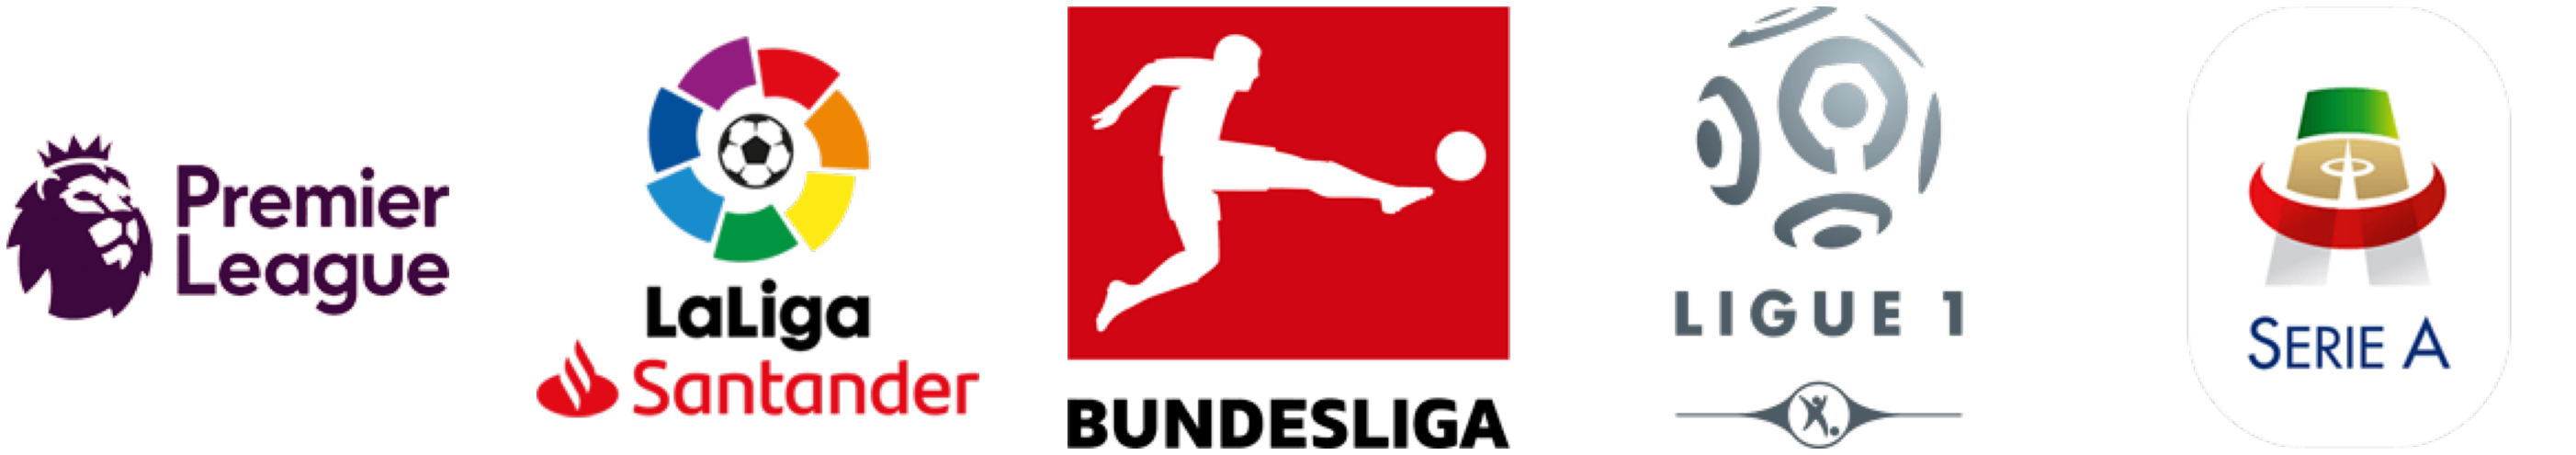

In [10]:
emblem_img = []
emblem_dict = {}
print("League Emblems:")
for emblem in emblems:
    response = requests.get(emblem,stream=True)
    emblem_img.append(Image.open(response.raw))

emblem_dict.update(zip(league_codes, emblems))
fname = "emblems.json"
out_path = dir_raw / fname
print("Writing data to %s" % out_path)
fout = open(out_path, "w")
json.dump(emblem_dict, fout, indent = 4, sort_keys = True)
fout.close()
fig, axs = plt.subplots(1,5,figsize=(50,50)) 

axs[0].imshow(emblem_img[0])
axs[1].imshow(emblem_img[1])
axs[2].imshow(emblem_img[2])
axs[3].imshow(emblem_img[3])
axs[4].imshow(emblem_img[4])
for i in range(0,5):
    axs[i].axis('off')

The dataframe shows the relevant information about each league.

In [7]:
df = pd.DataFrame(league_metadata).set_index("League Name")
df['Emblem']=emblems
def to_img_tag(path):
    return '<img src="'+ path + '" width="50" >'
display(HTML(df.to_html(escape=False,formatters=dict(Emblem=to_img_tag))))

,League Code,League ID,Country,Country Code,Emblem
League Name,,,,,
Premier League,PL,2021,England,ENG,
Primera Division,PD,2014,Spain,ESP,
Bundesliga,BL1,2002,Germany,DEU,
Ligue 1,FL1,2015,France,FRA,
Serie A,SA,2019,Italy,ITA,


Function using the previously created fetch function to get and save data for a specified league, season and data type.

In [8]:
def get_and_save_data(league_name, data_type, season):
    endpoint = "{}/{}?season={}".format(league_name, data_type, season)
    league_data = fetch(endpoint)
    fname = "{}_{}_{}.json".format(league_name, data_type, season)
    out_path = dir_raw / fname
    print("Writing data to %s" % out_path)
    fout = open(out_path, "w")i
    json.dump(league_data, fout, indent = 4, sort_keys = True)
    fout.close()

Collect data for each league, seasons and data types. The time.sleep() function is utilised to wait for a minute after 9 calls to the API, as only 10 calls can be made to the API per minute.

In [11]:
import time
seasons = ["2020","2021"]
data_types = ["matches","standings","scorers"]
i = 0
for league in league_codes:
    for season in seasons:
        for data_type in data_types:
            if i >= 9:
                time.sleep(60)
                i = 0
            get_and_save_data(league, data_type, season)
            i+=1


Fetching From https://api.football-data.org/v4/competitions/PL/matches?season=2020
Writing data to raw\PL_matches_2020.json

Fetching From https://api.football-data.org/v4/competitions/PL/standings?season=2020
Writing data to raw\PL_standings_2020.json

Fetching From https://api.football-data.org/v4/competitions/PL/scorers?season=2020
Writing data to raw\PL_scorers_2020.json

Fetching From https://api.football-data.org/v4/competitions/PL/matches?season=2021
Writing data to raw\PL_matches_2021.json

Fetching From https://api.football-data.org/v4/competitions/PL/standings?season=2021
Writing data to raw\PL_standings_2021.json

Fetching From https://api.football-data.org/v4/competitions/PL/scorers?season=2021
Writing data to raw\PL_scorers_2021.json

Fetching From https://api.football-data.org/v4/competitions/PD/matches?season=2020
Writing data to raw\PD_matches_2020.json

Fetching From https://api.football-data.org/v4/competitions/PD/standings?season=2020
Writing data to raw\PD_standing